In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_classif
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
#importing ploting libraries
import matplotlib.pyplot as plt
#importing seaborn for statistical plots
import seaborn as sns
#importing ploting libraries
import matplotlib.pyplot as plt
#styling figures
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)
#To enable plotting graphs in Jupyter notebook
%matplotlib inline
#importing the feature scaling library
from sklearn.preprocessing import StandardScaler
#Import Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
# Import Linear Regression, Ridge and Lasso machine learning library
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Import KNN Regressor machine learning library
from sklearn.neighbors import KNeighborsRegressor
# Import Decision Tree Regressor machine learning library
from sklearn.tree import DecisionTreeRegressor
# Import ensemble machine learning library
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
# Import support vector regressor machine learning library
from sklearn.svm import SVR
#Import the metrics
from sklearn import metrics
#Import the Voting regressor for Ensemble
from sklearn.ensemble import VotingRegressor
# Import stats from scipy
from scipy import stats
# Import zscore for scaling
from scipy.stats import zscore
#importing the metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#importing the K fold
from sklearn.model_selection import KFold
#importing the cross validation score
from sklearn.model_selection import cross_val_score
#importing the preprocessing library
from sklearn import preprocessing
# importing the Polynomial features
from sklearn.preprocessing import PolynomialFeatures
#importing kmeans clustering library
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelBinarizer
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from scipy import stats

In [2]:
df = pd.read_csv('Loan_data.csv', sep=',')

C:\Users\Iwona Gebska\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.shape

(42536, 151)

In [4]:
df

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501        NaN     5000.0       5000.0           4975.0   
1      1077430        NaN     2500.0       2500.0           2500.0   
2      1077175        NaN     2400.0       2400.0           2400.0   
3      1076863        NaN    10000.0      10000.0          10000.0   
4      1075358        NaN     3000.0       3000.0           3000.0   
...        ...        ...        ...          ...              ...   
42531    73582        NaN     3500.0       3500.0            225.0   
42532    72998        NaN     1000.0       1000.0              0.0   
42533    72176        NaN     2525.0       2525.0            225.0   
42534    71623        NaN     6500.0       6500.0              0.0   
42535    70686        NaN     5000.0       5000.0              0.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ...   
1       60 months   15.27%        59.83     C        C4  ...   
2       36 months   15.96%        84.33     C        C5  ...   
3       36 months   13.49%       339.31     C        C1  ...   
4       60 months   12.69%        67.79     B        B5  ...   
...           ...      ...          ...   ...       ...  ...   
42531   36 months   10.28%       113.39     C        C1  ...   
42532   36 months    9.64%        32.11     B        B4  ...   
42533   36 months    9.33%        80.69     B        B3  ...   
42534   36 months    8.38%       204.84     A        A5  ...   
42535   36 months    7.75%       156.11     A        A3  ...   

      hardship_payoff_balance_amount hardship_last_payment_amount  \
0                                NaN                          NaN   
1                                NaN                          NaN   
2                                NaN                          NaN   
3                                NaN                          NaN   
4                                NaN                          NaN   
...                              ...                          ...   
42531                            NaN                          NaN   
42532                            NaN                          NaN   
42533                            NaN                          NaN   
42534                            NaN                          NaN   
42535                            NaN                          NaN   

      disbursement_method  debt_settlement_flag debt_settlement_flag_date  \
0                    Cash                     N                       NaN   
1                    Cash                     N                       NaN   
2                    Cash                     N                       NaN   
3                    Cash                     N                       NaN   
4                    Cash                     N                       NaN   
...                   ...                   ...                       ...   
42531                Cash                     N                       NaN   
42532                Cash                     N                       NaN   
42533                Cash                     N                       NaN   
42534                Cash                     N                       NaN   
42535                Cash                     N                       NaN   

      settlement_status settlement_date settlement_amount  \
0                   NaN             NaN               NaN   
1                   NaN             NaN               NaN   
2                   NaN             NaN               NaN   
3                   NaN             NaN               NaN   
4                   NaN             NaN               NaN   
...                 ...             ...               ...   
42531               NaN             NaN               NaN   
42532               NaN             NaN               NaN   
42533               NaN             NaN               NaN   
42534               NaN             Na

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42536 entries, 0 to 42535
Columns: 151 entries, id to settlement_term
dtypes: float64(120), object(31)
memory usage: 49.0+ MB


In [6]:
df.describe(include= 'all')

id  member_id     loan_amnt   funded_amnt  funded_amnt_inv  \
count    42536.0        0.0  42535.000000  42535.000000     42535.000000   
unique   42536.0        NaN           NaN           NaN              NaN   
top     655357.0        NaN           NaN           NaN              NaN   
freq         1.0        NaN           NaN           NaN              NaN   
mean         NaN        NaN  11089.722581  10821.585753     10139.938785   
std          NaN        NaN   7410.938391   7146.914675      7131.598014   
min          NaN        NaN    500.000000    500.000000         0.000000   
25%          NaN        NaN   5200.000000   5000.000000      4950.000000   
50%          NaN        NaN   9700.000000   9600.000000      8500.000000   
75%          NaN        NaN  15000.000000  15000.000000     14000.000000   
max          NaN        NaN  35000.000000  35000.000000     35000.000000   

              term int_rate   installment  grade sub_grade  ...  \
count        42535    42535  42535.000000  42535     42535  ...   
unique           2      394           NaN      7        35  ...   
top      36 months   10.99%           NaN      B        B3  ...   
freq         31534      970           NaN  12389      2997  ...   
mean           NaN      NaN    322.623063    NaN       NaN  ...   
std            NaN      NaN    208.927216    NaN       NaN  ...   
min            NaN      NaN     15.670000    NaN       NaN  ...   
25%            NaN      NaN    165.520000    NaN       NaN  ...   
50%            NaN      NaN    277.690000    NaN       NaN  ...   
75%            NaN      NaN    428.180000    NaN       NaN  ...   
max            NaN      NaN   1305.190000    NaN       NaN  ...   

       hardship_payoff_balance_amount hardship_last_payment_amount  \
count                             0.0                          0.0   
unique                            NaN                          NaN   
top                               NaN                          NaN   
freq                              NaN                          NaN   
mean                              NaN                          NaN   
std                               NaN                          NaN   
min                               NaN                          NaN   
25%                               NaN                          NaN   
50%                               NaN                          NaN   
75%                               NaN                          NaN   
max                               NaN                          NaN   

       disbursement_method  debt_settlement_flag debt_settlement_flag_date  \
count                42535                 42535                       160   
unique                   1                     2                        63   
top                   Cash                     N                  Jun-2017   
freq                 42535                 42375                        18   
mean                   NaN                   NaN                       NaN   
std                    NaN                   NaN                       NaN   
min                    NaN                   NaN                       NaN   
25%                    NaN                   NaN                       NaN   
50%                    NaN                   NaN                       NaN   
75%                    NaN                   NaN                       NaN   
max                    NaN                   NaN                       NaN   

       settlement_status settlement_date settlement_amount  \
count                160             160        160.000000   
unique                 3              61               NaN   
top             COMPLETE        Sep-2013               NaN   
freq                 142               8               NaN   
mean                 NaN             NaN       4272.137875   
std                  NaN             NaN       3119.373774   
min                  NaN             NaN        193.290000   
25%                  N

In [7]:
#Usuniecie_wszystkich_kolumn_pustych
df1=df.dropna(how='all', axis = 1, inplace=True)
df1

In [8]:
brakujace_dane = df.isnull().sum().sort_values()
brakujace_dane.tail(35)

loan_status                       1
pymnt_plan                        1
url                               1
hardship_flag                     1
funded_amnt_inv                   1
sub_grade                         1
last_credit_pull_d                5
annual_inc                        5
title                            14
total_acc                        30
pub_rec                          30
open_acc                         30
acc_now_delinq                   30
delinq_amnt                      30
inq_last_6mths                   30
delinq_2yrs                      30
earliest_cr_line                 30
last_pymnt_d                     84
revol_util                       91
tax_liens                       106
chargeoff_within_12_mths        146
collections_12_mths_ex_med      146
emp_length                     1113
pub_rec_bankruptcies           1366
emp_title                      2627
desc                          13294
mths_since_last_delinq        26927
mths_since_last_record      

In [9]:
#Usunięłam kolumny  z największą liczbą pustych wartości 
df.drop(axis=1, columns=['settlement_percentage',
                         'settlement_status',
                         'settlement_date',
                         'settlement_amount',
                         'settlement_term',
                         'debt_settlement_flag_date'], inplace=True)
df.drop(axis=1, columns=['next_pymnt_d'], inplace=True)
df.drop(axis=1, columns=['mths_since_last_record'], inplace=True)
df.drop(axis=1, columns=['mths_since_last_delinq'], inplace=True)
df.drop(axis=1, columns=['desc'], inplace=True)
df.drop(axis=1, columns=['collections_12_mths_ex_med'], inplace=True)
df.drop(axis=1, columns=['chargeoff_within_12_mths'], inplace=True)
df.drop(axis=1, columns=['tax_liens'], inplace=True)


#Informacje nieistotne w dalszej analizie
df.drop(axis=1, columns=['url'], inplace=True)
df.drop(axis=1, columns=['zip_code'], inplace=True)
df.drop(axis=1, columns=['emp_title'], inplace=True)


#Uzupełnienie pustych wartości modą

df['application_type']=df['application_type'].fillna(df['application_type'].mode()[0])
df['initial_list_status']=df['initial_list_status'].fillna(df['initial_list_status'].mode()[0])
df['title']=df['title'].fillna('brak')


### Poniżej usunęłam kolumny z informacjami niedostępnymi w momencie udzielenia pożyczki


In [10]:
# Information from future
df.drop(axis=1, columns=['pub_rec_bankruptcies',
                         'hardship_flag',
                         'disbursement_method',
                         'debt_settlement_flag',
                         'pub_rec_bankruptcies'], inplace=True)
df.drop(axis=1, columns=['application_type',
                         'acc_now_delinq',
                         'delinq_amnt',
                         'policy_code'], inplace=True)
df.drop(axis=1, columns=['grade',
                         'sub_grade',
                         'pymnt_plan',
                         'collection_recovery_fee',
                         'inq_last_6mths',
                         'last_credit_pull_d',
                         'last_pymnt_amnt',
                         'total_rec_late_fee',
                         'total_rec_int',
                         'delinq_2yrs'], inplace=True) 
df.drop(axis=1, columns=['recoveries'], inplace=True)
df.drop(axis=1, columns=['revol_util'], inplace=True)
df.drop(axis=1, columns=['addr_state'], inplace=True)
df.drop(axis=1, columns=['out_prncp',
                         'out_prncp_inv'], inplace=True)


In [11]:

df.drop(axis=1, columns=['earliest_cr_line'], inplace=True)
df.drop(df[df['loan_status']=='Does not meet the credit policy. Status:Fully Paid'].index, inplace=True)
df.drop(df[df['loan_status']=='Does not meet the credit policy. Status:Charged Off'].index, inplace=True)
df.drop(axis=1, columns=['title'], inplace=True)


In [12]:
#Usuniecie wierszy z pustymi wierszami

df.dropna(how='any', axis = 0, inplace = True)

In [13]:
brakujace_dane = df.isnull().sum().sort_values()
brakujace_dane.tail(10)

home_ownership          0
emp_length              0
installment             0
int_rate                0
term                    0
funded_amnt_inv         0
funded_amnt             0
loan_amnt               0
last_fico_range_high    0
last_fico_range_low     0
dtype: int64

### Zmiana typów zmiennych

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39785
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38642 non-null  object 
 1   loan_amnt             38642 non-null  float64
 2   funded_amnt           38642 non-null  float64
 3   funded_amnt_inv       38642 non-null  float64
 4   term                  38642 non-null  object 
 5   int_rate              38642 non-null  object 
 6   installment           38642 non-null  float64
 7   emp_length            38642 non-null  object 
 8   home_ownership        38642 non-null  object 
 9   annual_inc            38642 non-null  float64
 10  verification_status   38642 non-null  object 
 11  issue_d               38642 non-null  object 
 12  loan_status           38642 non-null  object 
 13  purpose               38642 non-null  object 
 14  dti                   38642 non-null  float64
 15  fico_range_low     

In [15]:
df

id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0      1077501     5000.0       5000.0           4975.0   36 months   10.65%   
1      1077430     2500.0       2500.0           2500.0   60 months   15.27%   
2      1077175     2400.0       2400.0           2400.0   36 months   15.96%   
3      1076863    10000.0      10000.0          10000.0   36 months   13.49%   
4      1075358     3000.0       3000.0           3000.0   60 months   12.69%   
...        ...        ...          ...              ...         ...      ...   
39781    92187     2500.0       2500.0           1075.0   36 months    8.07%   
39782    90665     8500.0       8500.0            875.0   36 months   10.28%   
39783    90395     5000.0       5000.0           1325.0   36 months    8.07%   
39784    90376     5000.0       5000.0            650.0   36 months    7.43%   
39785    87023     7500.0       7500.0            800.0   36 months   13.75%   

       installment emp_length home_ownership  annual_inc  ... pub_rec  \
0           162.87  10+ years           RENT     24000.0  ...     0.0   
1            59.83   < 1 year           RENT     30000.0  ...     0.0   
2            84.33  10+ years           RENT     12252.0  ...     0.0   
3           339.31  10+ years           RENT     49200.0  ...     0.0   
4            67.79     1 year           RENT     80000.0  ...     0.0   
...            ...        ...            ...         ...  ...     ...   
39781        78.42    4 years       MORTGAGE    110000.0  ...     0.0   
39782       275.38    3 years           RENT     18000.0  ...     0.0   
39783       156.84   < 1 year       MORTGAGE    100000.0  ...     0.0   
39784       155.38   < 1 year       MORTGAGE    200000.0  ...     0.0   
39785       255.43   < 1 year            OWN     22000.0  ...     0.0   

      revol_bal total_acc initial_list_status   total_pymnt  total_pymnt_inv  \
0       13648.0       9.0                   f   5863.155187          5833.84   
1        1687.0       4.0                   f   1014.530000          1014.53   
2        2956.0      10.0                   f   3005.666844          3005.67   
3        5598.0      37.0                   f  12231.890000         12231.89   
4       27783.0      38.0                   f   4066.908161          4066.91   
...         ...       ...                 ...           ...              ...   
39781    7274.0      40.0                   f   2822.969293          1213.88   
39782    8847.0       9.0                   f   9913.491822          1020.51   
39783    9698.0      20.0                   f   5272.161128          1397.12   
39784   85607.0      26.0                   f   5174.198551           672.66   
39785    4175.0       8.0                   f   9195.263334           980.83   

       total_rec_prncp  last_pymnt_d  last_fico_range_high  \
0              5000.00      Jan-2015                 739.0   
1               456.46      Apr-2013                 499.0   
2              2400.00      Jun-2014                 739.0   
3             10000.00      Jan-2015                 604.0   
4              3000.00      Jan-2017                 684.0   
...                ...           ...                   ...   
39781          2500.00      Jul-2010                 809.0   
39782          8500.00      Jul-2010                 639.0   
39783          5000.00      Apr-2008                 744.0   
39784          5000.00      Jan-2008                 814.0   
39785          7500.00      Jun-2010                 679.0   

       last_fico_range_low  
0                    735.0  
1                      0.0  
2                    735.0  
3                    600.0  
4                    680.0  
...                    ...  
39781                805.0  
39782                635.0  
39783                740.0  
39784                810.0  
39785                675.0  

[38642 rows x 28 columns]

 Zamieniłam zmienne object na category oraz wartości liczbowe na float16

In [16]:
df['loan_status'] = df['loan_status'].astype('category')
df['purpose'] = df['purpose'].astype('category')
df['open_acc'] = df['open_acc'].astype('float16')
df['pub_rec'] = df['pub_rec'].astype('float16')
df['total_acc'] = df['total_acc'].astype('float16')
df['loan_amnt'] = df['loan_amnt'].astype('float16')
df['funded_amnt'] = df['funded_amnt'].astype('float16')

Zamieniłam kolumne int_rate na lczbową- usunęłam znak % oraz zamieniłam procenty na liczbę

In [17]:
df['int_rate'] = df['int_rate'].map(lambda x: float(x[:-1])/100)

In [18]:
df['emp_length'] = df['emp_length'].astype('category')
df['home_ownership'] = df['home_ownership'].astype('category')
df['verification_status'] = df['verification_status'].astype('category')
df['loan_status'] = df['loan_status'].astype('category')


In [19]:
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'])

In [20]:
df.iloc[0:5, 0:20]

id  loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0  1077501     5000.0       5000.0           4975.0   36 months    0.1065   
1  1077430     2500.0       2500.0           2500.0   60 months    0.1527   
2  1077175     2400.0       2400.0           2400.0   36 months    0.1596   
3  1076863    10000.0      10000.0          10000.0   36 months    0.1349   
4  1075358     3000.0       3000.0           3000.0   60 months    0.1269   

   installment emp_length home_ownership  annual_inc verification_status  \
0       162.87  10+ years           RENT     24000.0            Verified   
1        59.83   < 1 year           RENT     30000.0     Source Verified   
2        84.33  10+ years           RENT     12252.0        Not Verified   
3       339.31  10+ years           RENT     49200.0     Source Verified   
4        67.79     1 year           RENT     80000.0     Source Verified   

     issue_d  loan_status         purpose    dti  fico_range_low  \
0 2011-12-01   Fully Paid     credit_card  27.65           735.0   
1 2011-12-01  Charged Off             car   1.00           740.0   
2 2011-12-01   Fully Paid  small_business   8.72           735.0   
3 2011-12-01   Fully Paid           other  20.00           690.0   
4 2011-12-01   Fully Paid           other  17.94           695.0   

   fico_range_high  open_acc  pub_rec  revol_bal  
0            739.0       3.0      0.0    13648.0  
1            744.0       3.0      0.0     1687.0  
2            739.0       2.0      0.0     2956.0  
3            694.0      10.0      0.0     5598.0  
4            699.0      15.0      0.0    27783.0

## Część 2 - eksploracyjna analiza danych

Można zacząć od mapy korelacji dla wszystkich kolumn, z uwzględnieniem `loan_status`.

Można ograniczyć się do 10 najbardziej dodatnio i 10 najbardziej ujemnie skorelowanych z targetem.

In [21]:
value = []

for row in df['loan_status']:
    if row =='Charged Off':
        value.append(0)
    elif row == 'Fully Paid':
        value.append(1)
        
df['loan_status']=value

In [22]:
bottom_5_corr = df.corr()['loan_status'].sort_values()[:5].index.to_list()

In [23]:
top_5_corr = df.corr()['loan_status'].sort_values()[-5:].index.to_list()

Text(0.5, 1.0, 'Correlation heatmap')

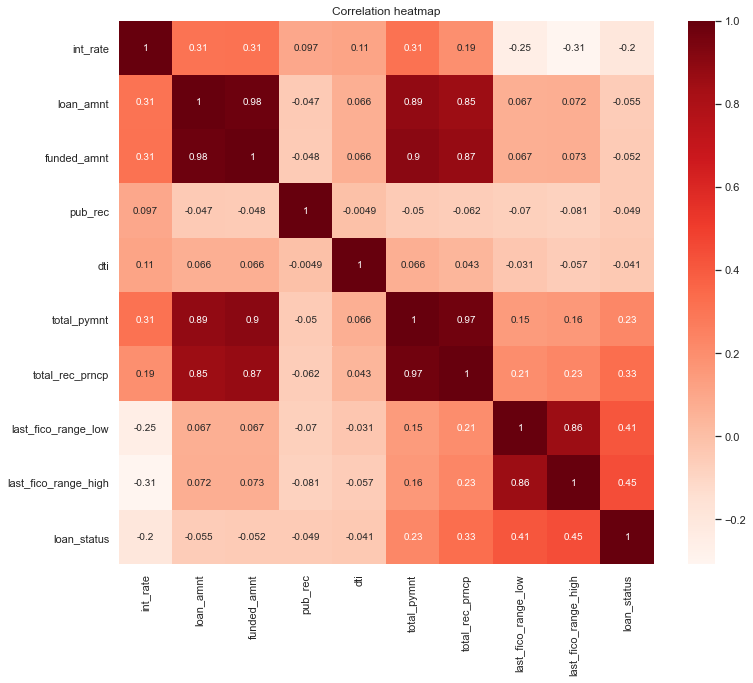

In [24]:
plt.figure(figsize=(12,10))
sns.heatmap(df[bottom_5_corr + top_5_corr].corr(),cmap='Reds',annot=True)
plt.title('Correlation heatmap')

In [25]:
data1 = np.array([-0.2, -0.055, -0.052,-0.049, -0.041, 0.23, 0.33, 0.41, 0.45])
data2 = np.array([-0.31, 0.072, 0.073, -0.081, -0.057, 0.16, 0.23, 0.86, 0.45])

In [38]:
print('Mean of first array: {:.2f}'.format(data1.mean()))
print('Mean of second array: {:.2f}'.format(data2.mean()))

Mean of first array: 0.11
Mean of second array: 0.16


In [40]:
from scipy.stats import ttest_rel
stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same mean')
else:
    print('Probably different mean')

stat=-0.710, p=0.498
Probably the same mean


In [39]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# Contingency table
table = [[10, 20, 30],
          [6,  9,  17]]
print(table)
stat, p, dof, expected = chi2_contingency(table)
print('dof=%d' % dof)
print(expected)

# First way to interpret the result, by test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

# Second way to interpret the result, by  p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

[[10, 20, 30], [6, 9, 17]]
dof=2
[[10.43478261 18.91304348 30.65217391]
 [ 5.56521739 10.08695652 16.34782609]]
probability=0.950, critical=5.991, stat=0.272
Independent (fail to reject H0)
significance=0.050, p=0.873
Independent (fail to reject H0)


### podpunkt 1 zadanie 2 W jaki sposób wynik FICO wiąże się z prawdopodobieństwem spłacenia pożyczki przez pożyczkobiorcę?

Text(0.5, 1.0, 'Correlation heatmap')

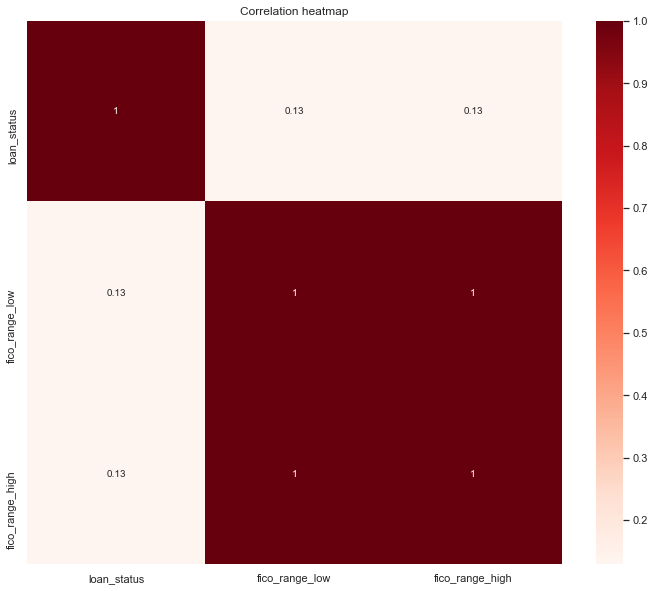

In [35]:
plt.figure(figsize=(12,10))
sns.heatmap(df[['loan_status', 'fico_range_low', 'fico_range_high']].corr(),cmap='Reds',annot=True)
plt.title('Correlation heatmap')

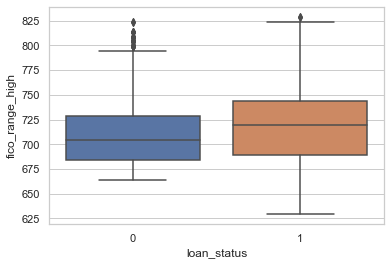

In [36]:
g = sns.boxplot(data=df, x='loan_status', y='fico_range_high')

In [ ]:
Pudełko granatowe przedstawia pożyczki niespłacone natomiast pudełko pomarańczowe pożyczki spłacone.
Wygląda na to, pudełko pomarańczowe (osoby które spłaciły pożyczki) mają wyższy rating FICO, ponieważ pudełko pomarańczowe 
znajduję troche wyżej niż pudełko niebieskie. W obu przypadkach wystepuja wartosci odstajace. 
W przypadku pożyczek spłaconych wartość fico ma duży rzrzut wartości i mniej obserwacji odstających.Wykres nie jest symetryczny

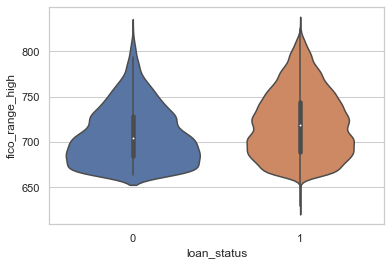

In [37]:
g = sns.violinplot(data=df, x='loan_status', y='fico_range_high')

In [ ]:
Widac ze mediana jest wyzsza w przypadku pozyczek spłaconych niż niespłaconych, jest większy rorzut danych 
oraz większa różnica między kwartylami 

W przypadku wykresu niebieskiego (pożyczek niespłąconych) widać duże natęzenie wartości x w dolnej granicy wartości fico.
Najwięcej wartości mieści sie w przedziale 650-700. 
Oba wykresy mają podobne górne wartości natomiast dolne w przypadku niebieskiego to ok 650 a pomaranczowego 625.
W przypadku pożyczek spłąconych rozkład jest bradziej równomierny

In [35]:
def compare_range_numerical_column(column_name):
    print('Range of values, fully paid: ', df[column_name][df['loan_status'] == 1].max()-df[column_name][df['loan_status'] == 1].min())
    print('Range of values, charged off: ', df[column_name][df['loan_status'] == 0].max()-df[column_name][df['loan_status'] == 0].min())

In [36]:
compare_range_numerical_column('fico_range_low')

Range of values, fully paid:  200
Range of values, charged off:  160


In [39]:
compare_range_numerical_column('loan_amnt')

Range of values, fully paid:  34500.0
Range of values, charged off:  34100.0


In [91]:
print('Minimum age: ', df['fico_range_high'].min())
print('Maximum age: ',df['fico_range_high'].max())
print('Mean value: ', df['fico_range_high'].mean())
print('Median value: ',df['fico_range_high'].median())
print('Standard deviation: ', df['fico_range_high'].std())

Minimum age:  664.0
Maximum age:  829.0
Mean value:  718.5083965701449
Median value:  714.0
Standard deviation:  35.51279177588695


In [92]:
#Quartiles

Q1=df['fico_range_high'].quantile(q=0.25)
Q3=df['fico_range_high'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(df['fico_range_high']))

1st Quartile (Q1) is:  689.0
3st Quartile (Q3) is:  744.0
Interquartile range (IQR) is  nan


In [31]:

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in fico_range_high: ', L_outliers)
print('Upper outliers in fico_range_high: ', U_outliers)

Lower outliers in annual_inc:  606.5
Upper outliers in annual_inc:  826.5


In [93]:
print('Number of outliers in fico_range_high upper : ', df[df['fico_range_high']>826.50]['fico_range_high'].count())
print('Number of outliers in fico_range_high lower : ',df[df['fico_range_high']<606.50]['fico_range_high'].count())
print('% of Outlier in fico_range_high upper: ',round(df[df['fico_range_high']>826.50]['fico_range_high'].count()*100/len(df)), '%')
print('% of Outlier in fico_range_high lower: ',round(df[df['fico_range_high']<606.50]['fico_range_high'].count()*100/len(df)), '%')

Number of outliers in fico_range_high upper :  2
Number of outliers in fico_range_high lower :  0
% of Outlier in fico_range_high upper:  0 %
% of Outlier in fico_range_high lower:  0 %


C:\Users\halupkam\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


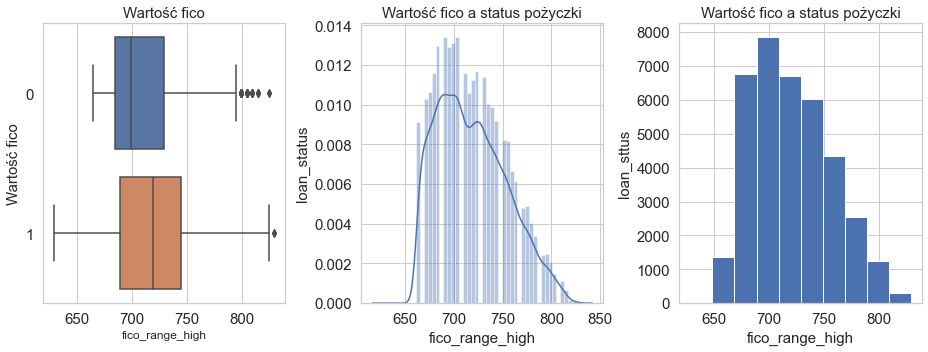

In [45]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='fico_range_high', y=['loan_status']==1, data=df,orient='h',ax=ax1)
ax1.set_ylabel('Wartość fico', fontsize=15)
ax1.set_title('Wartość fico', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['fico_range_high'],ax=ax2)
ax2.set_xlabel('fico_range_high', fontsize=15)
ax2.set_ylabel('loan_status', fontsize=15)
ax2.set_title('Wartość fico a status pożyczki', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['fico_range_high'])
ax3.set_xlabel('fico_range_high', fontsize=15)
ax3.set_ylabel('loan_sttus', fontsize=15)
ax3.set_title('Wartość fico a status pożyczki', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [38]:
value = []

for row in df['fico_range_high']:
    if row <= 580:
        value.append('Poor')
    elif row <= 669:
        value.append('Fair')
    elif  row <= 739:
        value.append('Good') 
    elif row <= 799:
        value.append('Very Good')
    elif row > 800:
        value.append('Exceptional')
   
        
df['fico_range_high_level']=value

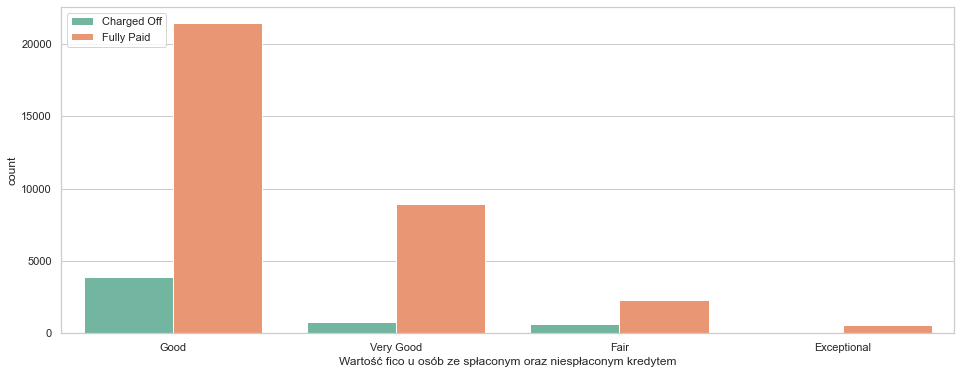

In [39]:
plt.figure(figsize=(16,6))
sns.countplot(data=df, x='fico_range_high_level', hue = 'loan_status', palette= 'Set2')
plt.xlabel('Wartość fico u osób ze spłaconym oraz niespłaconym kredytem')
plt.legend( loc='upper left', labels=['Charged Off', 'Fully Paid'])

In [40]:
df_cross_ho = pd.crosstab(df['fico_range_high_level'], df['loan_status'])
df_cross_ho 

loan_status               0      1
fico_range_high_level             
Exceptional              28    536
Fair                    656   2324
Good                   3882  21482
Very Good               808   8926

In [41]:
df_cross_ho.div(df_cross_ho.sum(axis=1), axis=0)

loan_status                   0         1
fico_range_high_level                    
Exceptional            0.049645  0.950355
Fair                   0.220134  0.779866
Good                   0.153052  0.846948
Very Good              0.083008  0.916992

In [42]:
Liczba obserwacji w grupach nie jest zbalansowana- najwięcej pożyczkobiorców występuje w rankingu Good, 
na drugim miejscu jest Very Good, natomiast namniej Fair i Exceptional.
Na jwieksza spłacalność pożyczki występuje z Fico > 800 jednak takich osób jest niweiele bo ok 100. 
Natomiast najwieksza liczba osób występuje w rankingu Good i w tym przypadku spłącalność pożyczki wynosi 85%. 
Porównując do liczby osób jest to bardzo dobry wynik

SyntaxError: invalid syntax (<ipython-input-42-22e3d361b5e6>, line 1)

<AxesSubplot:xlabel='loan_status', ylabel='fico_range_high'>

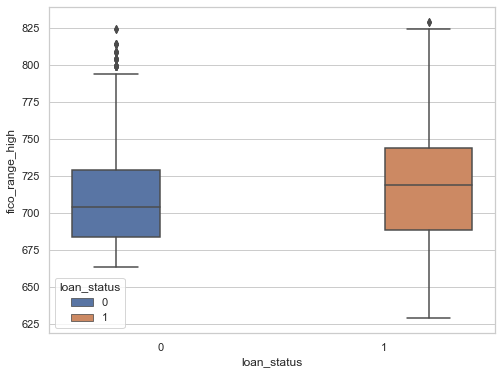

In [43]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='loan_status', y='fico_range_high',hue='loan_status')

In [ ]:
Tutaj ronież widać że osoby z wyższym Fico częsciej spłacają kredyt. 50% obserwacji znajduje się w przedziale 690-745. 
Występuję duży rorzut danych, pojedyncze obserwacje odstające. Dolny kwantyl równa się ok 690 natomiast górny 745.
Wnioskuję iż wynik fico ma wpływ na spłacalnośc pożyczki. Im wyższe fico tym większa spłacanośc, natomiast niewiele osób 
z wynikiem >800 decyduje się na wzięcie pozyczki. Większość osób to osoby z przedziału 670-740, 
które plasuja sie w rankingu jako Good oraz Very Good. Zdarzają się również sporadyczne przypadki niespłacenia pożyczki 
wśród tej grupy osób

### podpunkt2 W jaki sposób wiek kredytowy wiąże się z prawdopodobieństwem niewykonania zobowiązania i czy ryzyko to jest niezależne lub związane z wynikiem FICO


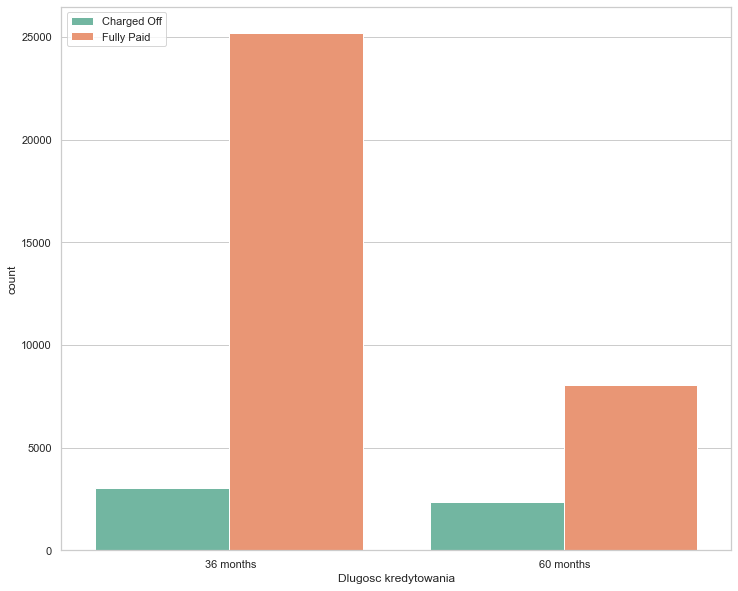

In [44]:
plt.figure(figsize=(12,10))
sns.countplot(data=df, x='term',hue='loan_status' , palette= 'Set2')
plt.xlabel('Dlugosc kredytowania')
plt.legend( loc='upper left', labels=['Charged Off', 'Fully Paid'])

In [45]:
df_cross_ho = pd.crosstab(df['term'], df['loan_status'])
df_cross_ho 

loan_status     0      1
term                    
 36 months   3023  25214
 60 months   2351   8054

In [46]:
df_cross_ho.div(df_cross_ho.sum(axis=1), axis=0)

loan_status         0         1
term                           
 36 months   0.107058  0.892942
 60 months   0.225949  0.774051

In [ ]:
Wyraznie widać że zdecydowana większość decyduje się na kredyt rozłozony na 36 miesiecy. Wśród tej grupy osób 89% osób 
spłaciło kredyt. Natomiast kredyt na 60 msc spłaciło 78%. Widać też że znacznie większa liczba osób decyduje się na kredyt na 36 msc.

<AxesSubplot:xlabel='loan_status', ylabel='fico_range_high'>

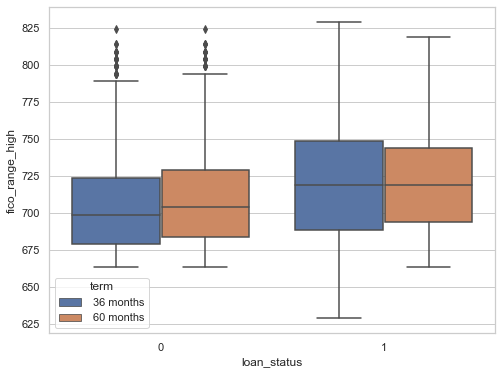

In [47]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='loan_status', y='fico_range_high', hue='term')

In [ ]:
Osoby które spłaciły kredyt mają wyższe fico. Widac że pudełka znajudją się wyżej niż u osób które nie spłaciły. 
Oznacza to że wartości fico u osób które spłaciły oscylują w grnaicach od 695-745, natomiast u osób które nie spłaciły 680-730.


### podpunkt 3 W jaki sposób status kredytu hipotecznego na dom wiąże się z prawdopodobieństwem niewypłacalności?

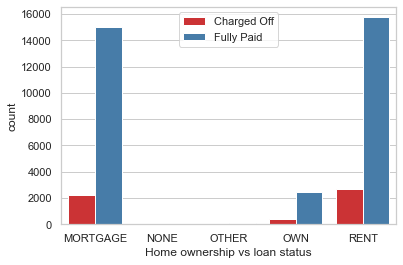

In [48]:
sns.countplot(data=df, x='home_ownership', hue = 'loan_status', palette= 'Set1')
plt.xlabel('Home ownership vs loan status')
plt.legend( loc='upper center', labels=['Charged Off', 'Fully Paid'])

In [49]:
df_cross_ho = pd.crosstab(df['home_ownership'], df['loan_status'])

In [50]:
df_cross_ho

loan_status        0      1
home_ownership             
MORTGAGE        2254  14987
NONE               0      3
OTHER             18     80
OWN              399   2443
RENT            2703  15755

In [51]:
df_cross_ho.div(df_cross_ho.sum(axis=1), axis=0)

loan_status            0         1
home_ownership                    
MORTGAGE        0.130735  0.869265
NONE            0.000000  1.000000
OTHER           0.183673  0.816327
OWN             0.140394  0.859606
RENT            0.146441  0.853559

In [ ]:
Wyraznie widac że wśród osób posiadających kredyt hipoteczny na dom aż 87% to osoby które spłaciły kredyt w terminie, 
pozostałe 12 % to osoby z niespłaconym kredytem. Dlatego też kredyt hipoteczny na dom nie wpływa negatywnie na spłacalnośc 
kredytu. Wręcz przeciwnie osoby z kredytem hipotecznym systematycznie spłacają kredyt niż pozostałe grupy.

### podpunkt 4  W jaki sposób roczny dochód wiąże się z prawdopodobieństwem niewykonania zobowiązania?

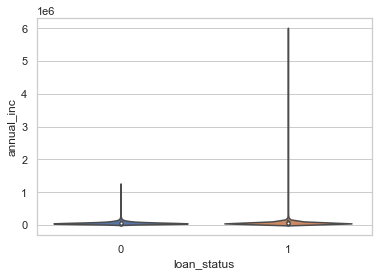

In [26]:
g = sns.violinplot(data=df, x='loan_status', y='annual_inc')

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

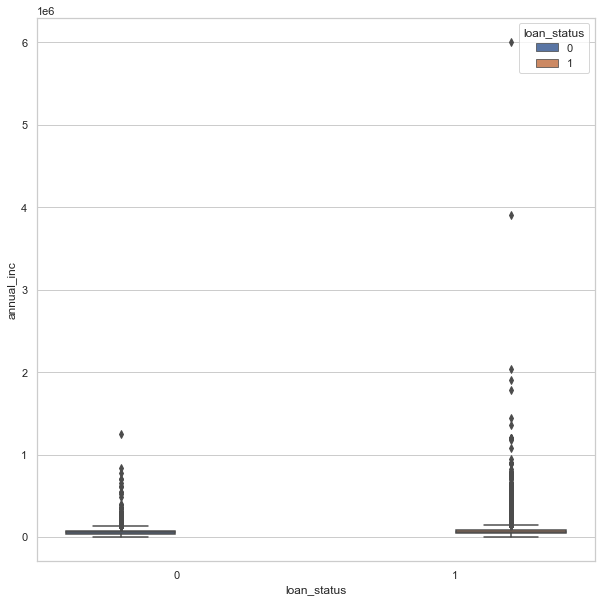

In [35]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df, x='loan_status', y='annual_inc', hue='loan_status')

Osoby mniej zarabiające częściej nie spłacają zobowiązań. Powyżej widać osoby w grupie 0 u których jest większe prawdopodobieństwo że nie spłącą swoich zobowiązań. Widać też, że ich zarobki są niewiele mniejsze od osób które spłacają zobowiązania.

### punkt 5 W jaki sposób historia zatrudnienia wiąże się z prawdopodobieństwem niewykonania zobowiązania?

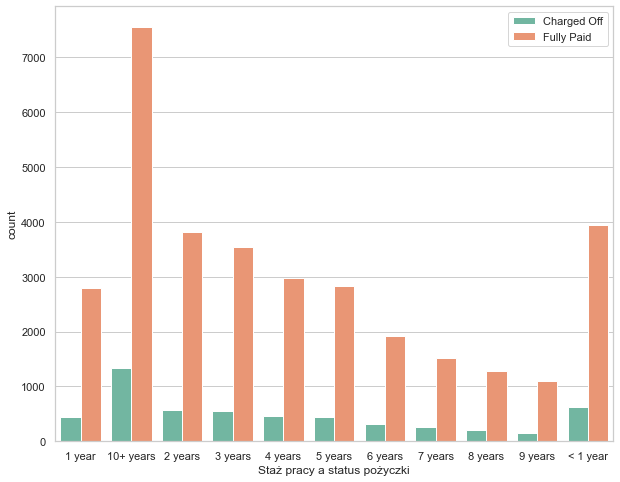

In [52]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='emp_length',hue='loan_status', palette= 'Set2')
plt.xlabel('Staż pracy a status pożyczki')
plt.legend( loc='upper right', labels=['Charged Off', 'Fully Paid'])

In [53]:
df_cross_ho = pd.crosstab(df['emp_length'], df['loan_status'])

In [54]:
df_cross_ho

loan_status     0     1
emp_length             
1 year        449  2787
10+ years    1339  7551
2 years       565  3823
3 years       551  3540
4 years       458  2978
5 years       450  2827
6 years       308  1922
7 years       262  1512
8 years       203  1279
9 years       156  1100
< 1 year      633  3949

In [55]:
df_cross_ho.div(df_cross_ho.sum(axis=1), axis=0)

loan_status         0         1
emp_length                     
1 year       0.138752  0.861248
10+ years    0.150619  0.849381
2 years      0.128760  0.871240
3 years      0.134686  0.865314
4 years      0.133295  0.866705
5 years      0.137321  0.862679
6 years      0.138117  0.861883
7 years      0.147689  0.852311
8 years      0.136977  0.863023
9 years      0.124204  0.875796
< 1 year     0.138149  0.861851

In [ ]:
Najwięcej osób biorących kredyt to osoby ze stażem >10lat. W tej grupie jest 85% spłaconych kredytów. 
Natomiast na drugim miejscu znajdują się osoby ze stażem mnijeszym niż 2 lata. W tej grupie spłacalnośc wynosi 87%.
Zastanawi


### punkt 6 Jak wielkość żądanej pożyczki jest powiązana z prawdopodobieństwem niewykonania zobowiązania?

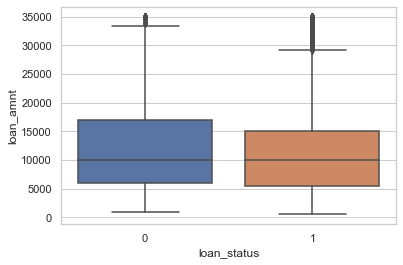

In [121]:
g = sns.boxplot(data=df, x='loan_status', y='loan_amnt')

In [36]:
df_cross_ho = pd.crosstab(df['loan_amnt'], df['loan_status'])
df_cross_ho

loan_status    0    1
loan_amnt            
500.0          0    5
700.0          0    1
725.0          0    1
750.0          0    1
800.0          0    1
...          ...  ...
34464.0        1    4
34528.0        0    1
34688.0        0    1
34816.0        0    2
35008.0      148  526

[880 rows x 2 columns]

In [37]:
df_cross_ho.div(df_cross_ho.sum(axis=1), axis=0)

loan_status         0         1
loan_amnt                      
500.0        0.000000  1.000000
700.0        0.000000  1.000000
725.0        0.000000  1.000000
750.0        0.000000  1.000000
800.0        0.000000  1.000000
...               ...       ...
34464.0      0.200000  0.800000
34528.0      0.000000  1.000000
34688.0      0.000000  1.000000
34816.0      0.000000  1.000000
35008.0      0.219585  0.780415

[880 rows x 2 columns]

Text(0, 0.5, 'Count')

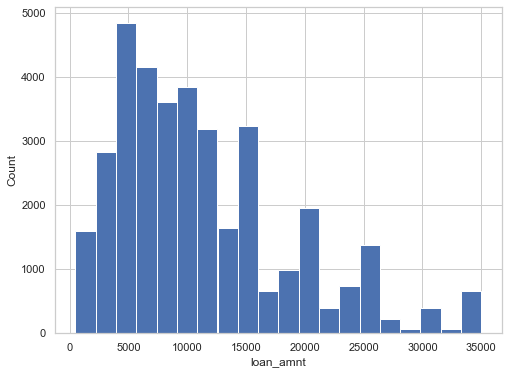

In [97]:
plt.figure(figsize=(8, 6))

fig = df['loan_amnt'].hist(bins=20)
fig.set_xlabel('loan_amnt')
fig.set_ylabel('Count')


In [ ]:
Osoby, u których jest większe prawdopodobieństwo niewykonania zobowiązania biorą najcześciej pożyczki w przedziale 5-16 tys.
Pojedyncze przypadki biorą pożyczki na kwoty powyżej 30tys.

In [67]:
df.to_csv('Loan_data_preprocessed.csv', index=False)